In [468]:
# for data handling cleaning and exploration
import pandas as pd 
# for visiualization
import matplotlib.pyplot as plt 
# for mathmatics
import numpy as np 
# for spliting data
from sklearn.model_selection import train_test_split
# for clustring taining data
from sklearn.cluster import KMeans
# neccesry to determine th number of clusters needd
from sklearn.metrics import silhouette_score
import seaborn as sns
# for linear regeission model
from sklearn.linear_model import LinearRegression
# for evaluating the regrission model
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing

In [469]:
# to read the data from the table and insert them in a pandas dataframe called fretility_rate
# the fertility_rate.csv file is saved at the same file the jupyter notebook is created so we can access it directly
fretility_rate = pd.read_csv('fertility_rate.csv')

In [470]:
#to see what the data in hand look like and how many rows, columns
# computing number of rows
rows = len(fretility_rate.axes[0])
 
# computing number of columns
cols = len(fretility_rate.axes[1])
 
print(fretility_rate)
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)                           

         Country  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
0         _World  4.98  5.00  5.03  5.05  5.06  5.04  4.99  4.97  4.92  ...   
1    Afghanistan  7.45  7.45  7.45  7.45  7.45  7.45  7.45  7.45  7.45  ...   
2        Albania  6.49  6.40  6.28  6.13  5.96  5.77  5.58  5.39  5.22  ...   
3        Algeria  7.52  7.57  7.61  7.65  7.67  7.68  7.68  7.67  7.67  ...   
4         Angola  6.71  6.79  6.87  6.95  7.04  7.12  7.19  7.27  7.33  ...   
..           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
182    Venezuela  6.36  6.30  6.23  6.16  6.07  5.98  5.87  5.75  5.61  ...   
183      Vietnam  6.35  6.39  6.43  6.45  6.46  6.48  6.49  6.49  6.49  ...   
184        Yemen  7.94  7.96  7.99  8.03  8.07  8.11  8.17  8.22  8.28  ...   
185       Zambia  7.12  7.17  7.21  7.25  7.27  7.29  7.30  7.32  7.33  ...   
186     Zimbabwe  7.16  7.22  7.27  7.31  7.35  7.37  7.39  7.40  7.41  ...   

     2011  2012  2013  2014  2015  2016  2017  2018

In [248]:
#or we can use head, tail functions to see the nature of the data
fretility_rate.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,_World,4.98,5.00,5.03,5.05,5.06,5.04,4.99,4.97,4.92,...,2.50,2.49,2.47,2.46,2.46,2.44,2.43,2.41,2.40,2.39
1,Afghanistan,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,...,5.77,5.56,5.36,5.16,4.98,4.80,4.63,4.47,4.32,4.18
2,Albania,6.49,6.40,6.28,6.13,5.96,5.77,5.58,5.39,5.22,...,1.67,1.68,1.69,1.69,1.68,1.66,1.64,1.62,1.60,1.58
3,Algeria,7.52,7.57,7.61,7.65,7.67,7.68,7.68,7.67,7.67,...,2.91,2.95,2.99,3.02,3.04,3.05,3.05,3.02,2.99,2.94
4,Angola,6.71,6.79,6.87,6.95,7.04,7.12,7.19,7.27,7.33,...,6.12,6.04,5.95,5.86,5.77,5.69,5.60,5.52,5.44,5.37


In [462]:
fretility_rate.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Change
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,5.533529,5.526578,5.514385,5.499251,5.472888,5.426043,5.375561,5.334545,5.281925,5.229358,...,2.883155,2.844813,2.820107,2.788770,2.758342,2.717112,2.684225,2.649626,2.610749,2.922781
std,1.735528,1.747268,1.762098,1.771850,1.784293,1.815374,1.846265,1.852808,1.875046,1.893093,...,1.410730,1.388468,1.355010,1.326472,1.296972,1.277288,1.255320,1.234040,1.215841,1.462160
min,1.940000,1.940000,1.790000,1.820000,1.790000,1.740000,1.580000,1.800000,1.830000,1.870000,...,1.270000,1.190000,1.210000,1.240000,1.170000,1.050000,0.980000,0.920000,0.840000,0.380000
25%,4.110000,3.930000,4.045000,4.000000,3.970000,3.825000,3.665000,3.555000,3.405000,3.260000,...,1.800000,1.760000,1.750000,1.745000,1.745000,1.725000,1.710000,1.705000,1.630000,1.565000
50%,6.250000,6.270000,6.220000,6.170000,6.130000,6.100000,6.080000,6.010000,5.940000,5.850000,...,2.420000,2.390000,2.370000,2.340000,2.320000,2.280000,2.260000,2.240000,2.210000,2.920000
75%,6.825000,6.830000,6.835000,6.835000,6.845000,6.805000,6.805000,6.775000,6.750000,6.730000,...,3.845000,3.790000,3.745000,3.700000,3.655000,3.610000,3.565000,3.525000,3.480000,4.210000
max,8.190000,8.190000,8.200000,8.200000,8.200000,8.200000,8.200000,8.220000,8.280000,8.330000,...,7.380000,7.310000,7.250000,7.170000,7.090000,7.000000,6.910000,6.820000,6.740000,5.560000


In [249]:
# since the years are handled as attribute and we are unable to reach spiecific values we will turn then into values
# for better access list of years for the melting of dataframe
years = list(map(lambda x: str(x), list(range(1960,2020))))

In [250]:
# melting dataframe
fertility_rate = pd.melt(fretility_rate,id_vars = ["Country"],
                         value_vars = years,
             var_name = 'year', value_name = "Fr", col_level = None)

In [251]:
fertility_rate.head(3)

,Country,year,Fr
0,_World,1960,4.98
1,Afghanistan,1960,7.45
2,Albania,1960,6.49


In [252]:
#exploring data set for missing values
len(fertility_rate)

11220

In [253]:
#since we have a total of 11594 values and none of these are missing
# we will check for error in the importaion of the data
fertility_rate.dtypes

Country     object
year        object
Fr         float64
dtype: object

In [254]:
# there's no faulty data type insertion on these row since the expected values are all met
# to ivestigate further will try showing the column 
non_string_year = fertility_rate.year.str.contains('[0-9]')
fertility_rate.loc[non_string_year].head()

,Country,year,Fr
0,_World,1960,4.98
1,Afghanistan,1960,7.45
2,Albania,1960,6.49
3,Algeria,1960,7.52
4,Angola,1960,6.71


In [255]:
mask = fertility_rate['Country'].eq('')
fertility_rate[mask]

,Country,year,Fr


In [257]:
mask = fertility_rate.isnull()

In [353]:
# Compute the mean and standard deviation of the data
mean = np.mean(fretility_rate)
std = np.std(fretility_rate)

In [360]:
# Set the number of standard deviations to use as the cutoff for identifying outliers
n_stds = 3

# Identify potential outliers using the mean and standard deviation
outliers = fretility_rate[np.abs(fretility_rate - mean) > n_stds * std]
print(outliers == True)

     Country   1960   1961   1962   1963   1964   1965   1966   1967   1968  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
..       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
182    False  False  False  False  False  False  False  False  False  False   
183    False  False  False  False  False  False  False  False  False  False   
184    False  False  False  False  False  False  False  False  False  False   
185    False  False  False  False  False  False  False  False  False  False   
186    False  False  False  False  False  False  False  False  False  False   

     ...   2012   2013   2014   2015   2016   2017 

C:\Users\hp\AppData\Local\Temp/ipykernel_21312/1007334038.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = fretility_rate[np.abs(fretility_rate - mean) > n_stds * std]


In [258]:
# theres no missing values in the dataset so there won't be any handling of missing data 
# no outliers to handle
# visiualize and analyze the dataset
group_by_year = fertility_rate.loc[:, ['Country', 'year', 'Fr']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.Fr
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

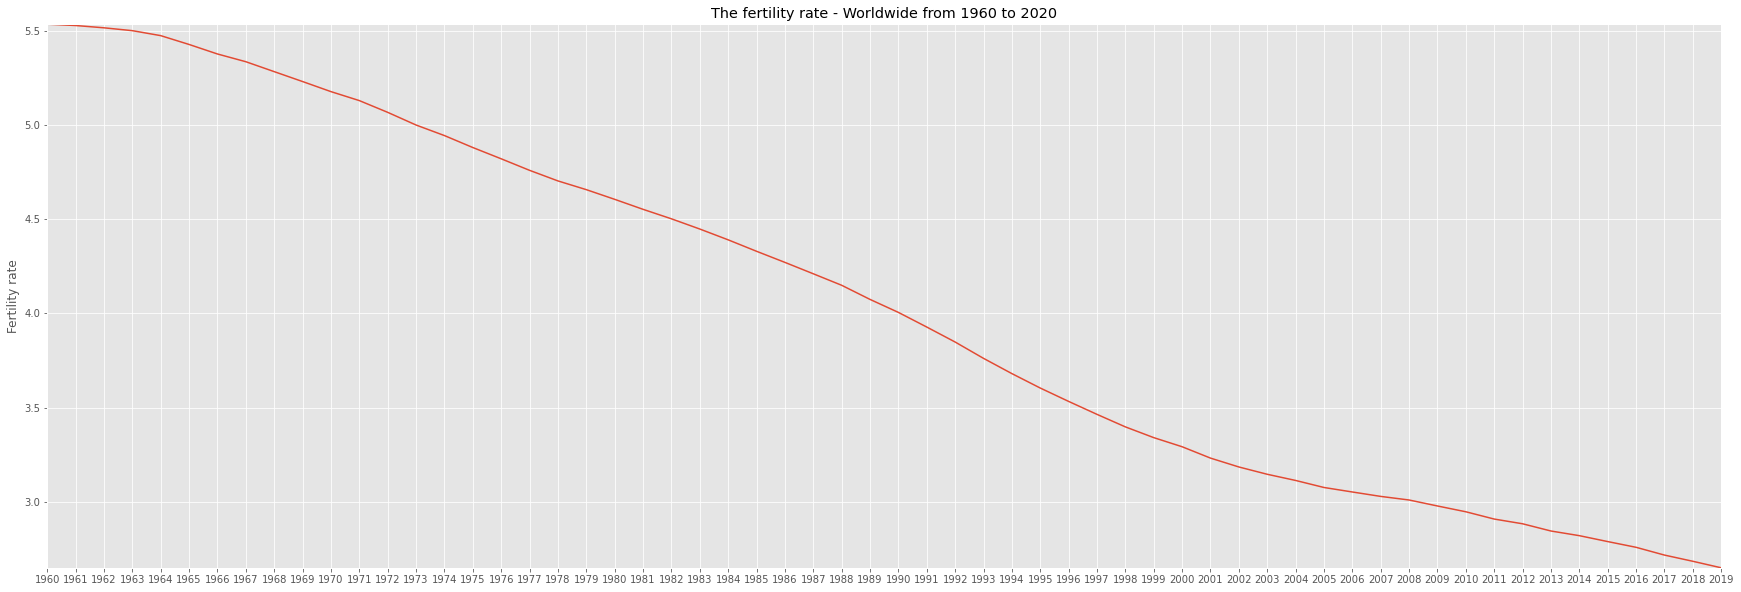

In [259]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
plot(x, y1, ax, 'The fertility rate - Worldwide from 1960 to 2020', 'Fertility rate')

In [260]:
# from the figure above theres a continues drop of the fertility rate with the highst value of 5.7 in 1960 and 
# lowest in 2020 2.4

# lets find the highest country and lowest fertility rate in 1960


In [261]:
### create a mini dataframes of the highest and lowest fertility rates
minfert = fretility_rate[fretility_rate['1960'] == fretility_rate['1960'].min()]
maxfert = fretility_rate[fretility_rate['1960'] == fretility_rate['1960'].max()]
### identify the highest and lowest countries, along with their 2020 fertility rate

print('The country with the highest fertility rate, as of 1960, is: ',
      maxfert.iloc[0,0], ', with a fertility rate of: ', fretility_rate['1960'].max())
print('The country with the lowest fertility rate, as of 1960, is: ',
      minfert.iloc[0,0], ', with a fertility rate of: ', fretility_rate['1960'].min())

The country with the highest fertility rate, as of 1960, is:  Rwanda , with a fertility rate of:  8.19
The country with the lowest fertility rate, as of 1960, is:  Latvia , with a fertility rate of:  1.94


In [262]:
# so now the highest fretililty rate in 1960 was in Rwanda and the lowest was Latvia

# lets find the highest country and lowest fertility rate in 2020

### create a mini dataframes of the highest and lowest fertility rates
minfert = fretility_rate[fretility_rate['2020'] == fretility_rate['2020'].min()]
maxfert = fretility_rate[fretility_rate['2020'] == fretility_rate['2020'].max()]
### identify the highest and lowest countries, along with their 2020 fertility rate

print('The country with the highest fertility rate, as of 2020, is: ',
      maxfert.iloc[0,0], ', with a fertility rate of: ', fretility_rate['2020'].max())
print('The country with the lowest fertility rate, as of 2020, is: ',
      minfert.iloc[0,0], ', with a fertility rate of: ', fretility_rate['2020'].min())

The country with the highest fertility rate, as of 2020, is:  Niger , with a fertility rate of:  6.74
The country with the lowest fertility rate, as of 2020, is:  South Korea , with a fertility rate of:  0.84


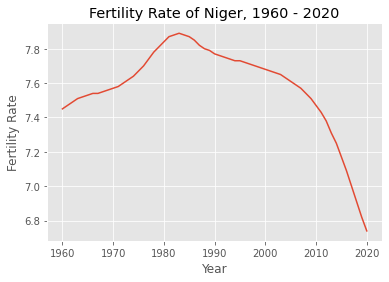

In [263]:
# so now the highest fretililty rate in 2020 was in Niger and the lowest was South Korea

# lets observe the trend of the country with the highst fertlity rate in 2020

maxplot = maxfert.T
maxplot = maxplot[1:]
### Create a basic line graph, adding axis labels and a title
maxplot.plot(legend = None)
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate of Niger, 1960 - 2020')
plt.show()

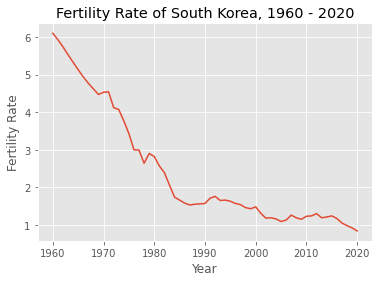

In [264]:
# as seen the fertility rate in Niger is decilining rapidly after it was increasing until 1983

# # lets observe the trend of the country with the lowest fertlity rate in 2020

minplot = minfert.T
minplot = minplot[1:]
### Create a basic line graph, adding axis labels and a title
minplot.plot(legend = None)
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate of South Korea, 1960 - 2020')
plt.show()

In [265]:
# in south korea the fertility rate is declining rapidly until 1984 then began to decline more discreetly afterwards

# lets obsereve the change in fr from 1960 to 2020
fretility_rate['Change'] = np.abs(fretility_rate['2020'] - fretility_rate['1960'])
### first 3 observations
fretility_rate.head(3)

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Change
0,_World,4.98,5.00,5.03,5.05,5.06,5.04,4.99,4.97,4.92,...,2.49,2.47,2.46,2.46,2.44,2.43,2.41,2.40,2.39,2.59
1,Afghanistan,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,...,5.56,5.36,5.16,4.98,4.80,4.63,4.47,4.32,4.18,3.27
2,Albania,6.49,6.40,6.28,6.13,5.96,5.77,5.58,5.39,5.22,...,1.68,1.69,1.69,1.68,1.66,1.64,1.62,1.60,1.58,4.91


In [266]:
# let's find the countries with the highest and lowest change in their fr
maxchange = fretility_rate[fretility_rate['Change'] == fretility_rate['Change'].max()]
minchange = fretility_rate[fretility_rate['Change'] == fretility_rate['Change'].min()]

# finding the highest and lowest countries
print('The country with the highest change fertility rate from 1960 to 2020 is: ',
      maxchange.iloc[0,0] ,"and",maxchange.iloc[1,0],'with a change of: ', fretility_rate['Change'].max())
print('The country with the least change in fertility rate from 1960 to 2020 is: ',
      minchange.iloc[0,0], ', with a change of: ', fretility_rate['Change'].min())


The country with the highest change fertility rate from 1960 to 2020 is:  St. Lucia and United Arab Emirates with a change of:  5.56
The country with the least change in fertility rate from 1960 to 2020 is:  Czechia , with a change of:  0.3799999999999999


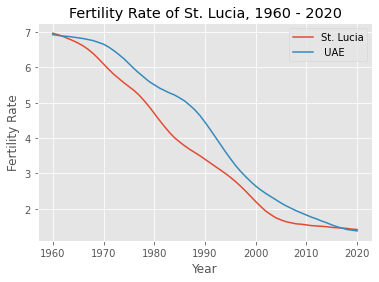

In [267]:
# as seen the highst change or decline of fr was in UAE and St.Lucia 
maxcplot = maxchange.T
maxcplot = maxcplot[1:-1]
### Create a basic line graph, adding axis labels, a legend and a title
maxcplot.plot()
plt.legend(['St. Lucia', ' UAE'])
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate of St. Lucia, 1960 - 2020')
plt.show()


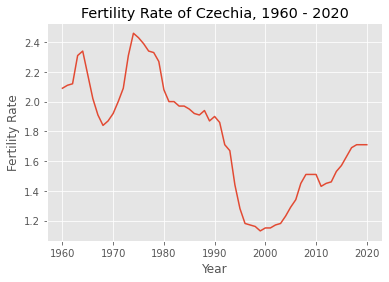

In [268]:
# 
mincplot = minchange.T
mincplot = mincplot[1:-1]
# Creating a plot , adding axis labels and a title
mincplot.plot(legend = None)
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate of Czechia, 1960 - 2020')
plt.show()

In [383]:

X = fertility_rate.drop(columns=['Fr','Country'])
y = fertility_rate['Fr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
rows = len(X_test)
# computing number of columns
cols = len(y_test)
print(rows, cols )

2244 2244


In [326]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42 )
kmeans.fit(X_train) #Replace your training dataset instead of x_train
# The lowest SSE value
print(kmeans.inertia_)
# Final locations of the centroid
print(kmeans.cluster_centers_)
# The number of iterations required to converge
print(kmeans.n_iter_)
# first five predicted labels 
print(kmeans.labels_[:5])


298134.30258490256
[[1990.59197879]
 [1970.05318808]
 [2010.04439746]]
5
[1 2 1 2 0]


In [335]:
clus = fertility_rate.drop(columns=['Country'])
clus = pd.DataFrame(clus)
clus.columns = ['year', 'Fr']
clus.head()

,year,Fr
0,1960,4.98
1,1960,7.45
2,1960,6.49
3,1960,7.52
4,1960,6.71


In [336]:
# Create the k-means model
kmeans = KMeans(n_clusters=3, max_iter=40).fit(clus)



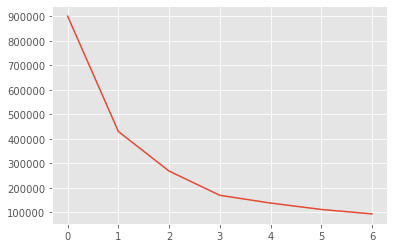

In [368]:
# Elbow Curve to get the right number of Cluster
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=40)
    kmeans.fit(clus)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [374]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(clus)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(clus, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.6058000067770053
For n_clusters=3, the silhouette score is 0.5533000931314114
For n_clusters=4, the silhouette score is 0.5150829546727067
For n_clusters=5, the silhouette score is 0.5291659232241898
For n_clusters=6, the silhouette score is 0.4955393372353631
For n_clusters=7, the silhouette score is 0.45821658896500644
For n_clusters=8, the silhouette score is 0.45065151195239134


In [475]:
# final kmean model

# Create the k-means model
kmeans = KMeans(n_clusters=3, max_iter=40).fit(clus)


In [476]:
 kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [477]:
 # assign the label
clus['Cluster_Id'] = kmeans.labels_
clus.head()

,year,Fr,Cluster_Id
0,1960,4.98,2
1,1960,7.45,2
2,1960,6.49,2
3,1960,7.52,2
4,1960,6.71,2


<AxesSubplot:xlabel='Cluster_Id', ylabel='Fr'>

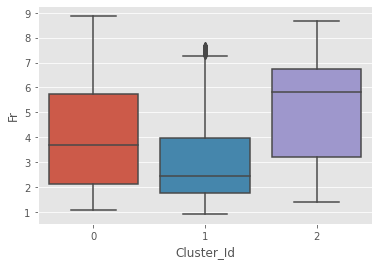

In [478]:
# Box plot to visualize Cluster Id  Fr

sns.boxplot(x='Cluster_Id', y='Fr', data=clus)

In [385]:
# linear ragrission prediction model
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [386]:
#Retrieve the intercept
print(regressor.intercept_)

113.0353365894169


In [388]:
#Retrieve the slop
print(regressor.coef_)

[-0.05478376]


In [392]:
#Comparing the predicted value to the actual value
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns= ["predicted"])
y_pred

,predicted
0,4.892190
1,3.358245
2,4.563488
3,3.577380
4,4.892190
...,...
2239,4.837406
2240,4.618271
2241,5.549595
2242,4.289569


In [393]:
y_test

2649    5.83
7867    1.93
3810    3.25
7260    1.13
2711    6.40
        ... 
2811    6.65
3732    2.79
481     3.24
4683    2.56
4535    1.40
Name: Fr, Length: 2244, dtype: float64

In [460]:
# evaluating the algorithm
print('Mean absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Mean absolute Error: 263.00222816399287
Mean squared Error: 115241.53231862745
Root Mean squared Error: 339.472432339693
Variance score: 0.22


In [413]:
#convert y values to categorical values
y = fertility_rate['Fr']
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
X = fertility_rate.drop(columns=['Fr','Country'])
X_train, X_test, y_ttrain, y_ttest = train_test_split(X, y_transformed, test_size=0.2, random_state=1)


In [414]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_ttrain)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [459]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_ttest, y_pred))

Accuracy: 0.0022281639928698753


In [422]:
# we can improve this accuracy by tuning the parameters in the Decision Tree Algorithm.
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_ttrain)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_ttest, y_pred))

Accuracy: 0.007575757575757576


In [424]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [456]:

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_ttrain)

y_pred=clf.predict(X_test)

In [457]:
# metrics module for accuracy calculation
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_ttest, y_pred))

Accuracy: 0.001336898395721925


In [458]:
#Creating a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_ttrain)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_ttest, y_pred))

Accuracy: 0.0022281639928698753


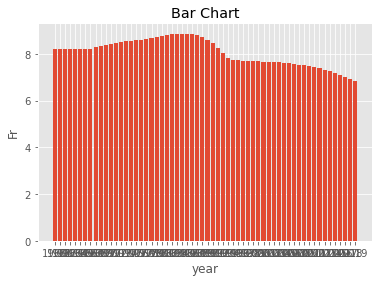

In [474]:

plt.bar(fertility_rate['year'], fertility_rate['Fr'])
 
plt.title("Bar Chart")
 
# Setting the X and Y labels
plt.xlabel('year')
plt.ylabel('Fr')
 
# Adding the legends

plt.show()

In [480]:
# Fit a pipeline using Training dataset and related labels
# Use Ridge algorithm for training the model
#
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipeline.fit(X_train, y_train)
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
#
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 3.141, test: 3.122
R^2 train: 0.222, test: 0.224
